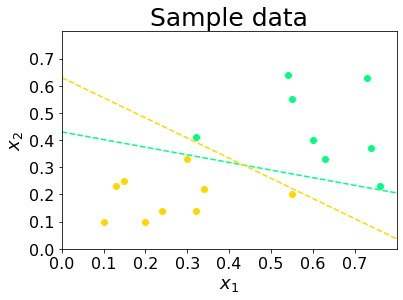

In [9]:
import numpy as np
import matplotlib.pyplot as plt


class_a_x = np.array([0.1, 0.15, 0.2, 0.13, 0.3, 0.24, 0.34, 0.32, 0.55])
class_a_y = np.array([0.1, 0.25, 0.1, 0.23, 0.33, 0.14, 0.22, 0.14, 0.2])

class_b_x = np.array([0.6, 0.55, 0.32, 0.73, 0.63, 0.54, 0.74, 0.82, 0.76])
class_b_y = np.array([0.4, 0.55, 0.41, 0.63, 0.33, 0.64, 0.37, 0.54, 0.23])

boundary_A = [[0.32], [0.41]]
boundary_B = [[0.55], [0.2]]

plt.scatter(class_a_x, class_a_y, color='gold')
plt.scatter(class_b_x, class_b_y, color='springgreen')
plt.plot([0, 0.82], [0.43, .2], '--', color='springgreen')
plt.plot([0, 0.85], [0.63, 0], '--', color='gold')
plt.title('Sample data', fontsize=25)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.xticks(np.arange(0, 0.8, 0.1), fontsize=16)
plt.yticks(np.arange(0, 0.8, 0.1), fontsize=16)
plt.xlim([0, 0.8])
plt.ylim([0, 0.8])
plt.savefig('svm-sample.eps', bbox_inches='tight', pad_inches=0)
plt.show()

In [10]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

values = np.concatenate([np.c_[class_a_x, class_a_y], np.c_[class_b_x, class_b_y]])
labels = np.array([[0]*len(class_a_x) + [1]*len(class_b_x)])
labels = labels.reshape(-1)

In [11]:
clf.fit(values, labels)

LinearSVC()

In [12]:
clf.coef_

array([[1.6785073 , 1.41274316]])

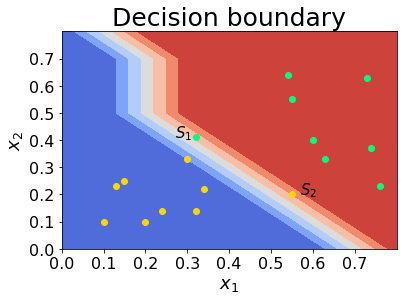

In [14]:

def make_meshgrid(x, y, h=0.2):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



X0, X1 = values[:, 0], values[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(plt, clf, xx, yy, cmap=plt.cm.coolwarm)#, alpha=0.8)
plt.scatter(class_a_x, class_a_y, color='gold')
plt.scatter(class_b_x, class_b_y, color='springgreen')
plt.title('Decision boundary', fontsize=25)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18)
plt.annotate('$S_1$', xy=(boundary_A[0][0] - 0.05, boundary_A[1][0]), fontsize=15)
plt.annotate('$S_2$', xy=(boundary_B[0][0] + 0.02, boundary_B[1][0]), fontsize=15)
plt.xticks(np.arange(0, 0.8, 0.1), fontsize=16)
plt.yticks(np.arange(0, 0.8, 0.1), fontsize=16)
plt.xlim([0, 0.8])
plt.ylim([0, 0.8])
plt.savefig('svm-boundary.eps', bbox_inches='tight', pad_inches=0)
plt.show()